In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.1 MB/s eta 0:00:00


In [22]:
import statsmodels.api as sm
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [23]:
inf = yf.Ticker("PERSISTENT.NS")
df = inf.history(period="10y").reset_index()
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.set_index('Date', inplace=True)
df1 = pd.DataFrame(df['Close'], df.index, columns=['Close'])
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-09-02,256.614743,264.998249,254.823024,256.128113,14788,0.0,0.0
2013-09-03,257.477516,259.689522,253.495905,258.207489,68626,0.0,0.0
2013-09-04,255.707828,260.574240,254.911512,259.777924,9106,0.0,0.0
2013-09-05,253.517940,258.826753,253.517940,258.052551,23606,0.0,0.0
2013-09-06,259.844286,259.844286,249.514230,251.416550,10066,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-25,5100.000000,5175.000000,5024.049805,5137.899902,420276,0.0,0.0
2023-08-28,5149.950195,5190.000000,5034.600098,5047.549805,298980,0.0,0.0
2023-08-29,5075.000000,5118.799805,5041.299805,5106.350098,232983,0.0,0.0


In [24]:
from pmdarima import auto_arima

val_find = auto_arima(df['Close'], trace=True, suppress_warnings=True)
val_find.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=3.81 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=27261.845, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=26735.805, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=26415.034, Time=0.16 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=26227.264, Time=0.23 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=26145.122, Time=0.34 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=26071.629, Time=0.37 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=6.19 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=5.56 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=26073.617, Time=0.78 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 18.037 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2466
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -13029.815
Date:                Thu, 31 Aug 2023   AIC                          26071.629
Time:                        14:42:16   BIC                          26106.487
Sample:                             0   HQIC                         26084.294
                               - 2466                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7719      0.010    -78.936      0.000      -0.791      -0.753
ar.L2         -0.6773      0.012    -57.748      0.000      -0.700      -0.654
ar.L3         -0.5063      0.014    -37.447      0.000      -0.533      -0.480
ar.L4         -0.3131      0.013    -23.716      0.000      -0.339      -0.287
ar.L5         -0.1743      0.011    -15.919      0.000      -0.196      -0.153
sigma2      2298.1654     27.734     82.865      0.000    2243.808    2352.523
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):              8868.53
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):              35.04   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
train = df1[:-60]
test = df1[-60:]

In [26]:
from statsmodels.tsa.arima.model import ARIMA

start = len(train)
end = len(train) + len(test) - 1

model = ARIMA(train['Close'], order = (5,2,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
pred = model_fit.predict(start=start, end=end, typ='levels')

p = [x for x in pred]
dfp = pd.DataFrame(p, test.index, columns=['Predicted Value'])
dfp

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,Predicted Value
Date,
2023-06-07,4947.848950
2023-06-08,4944.246953
2023-06-09,4916.178555
2023-06-12,4863.444432
2023-06-13,4807.150676
2023-06-14,4744.015561
2023-06-15,4705.874543
2023-06-16,4666.386095
2023-06-19,4619.743706


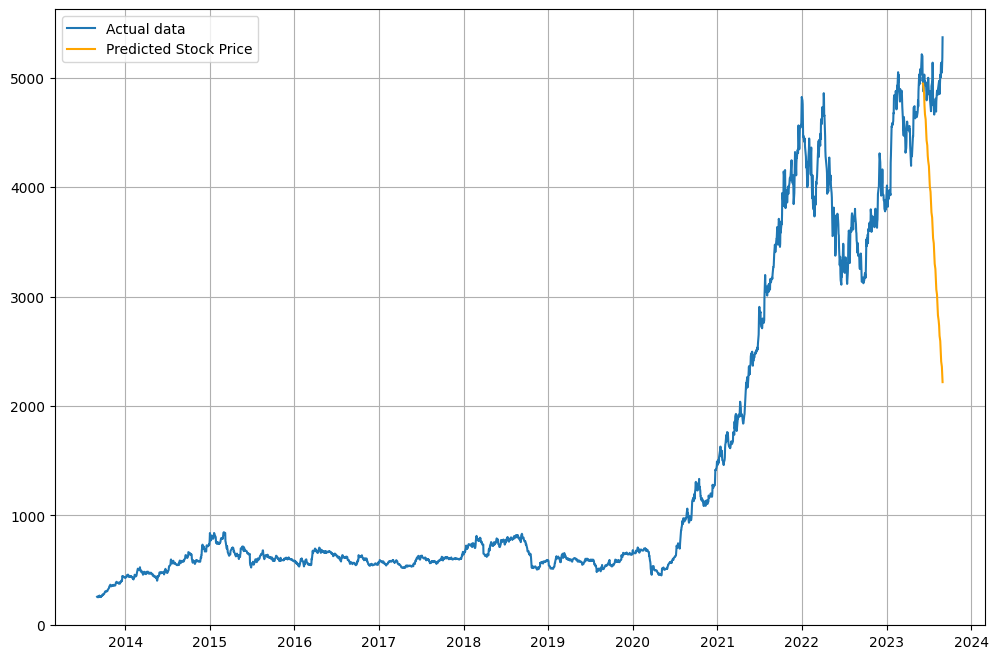

In [28]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Actual data')
plt.plot(dfp, color = 'orange',label='Predicted Stock Price')
plt.legend()
plt.grid()

In [29]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred, test['Close']))
print("RMSE: ", rmse)

print("Mean: ", df['Close'].mean())

RMSE:  1552.8732950579035
Mean:  1442.4193356553424


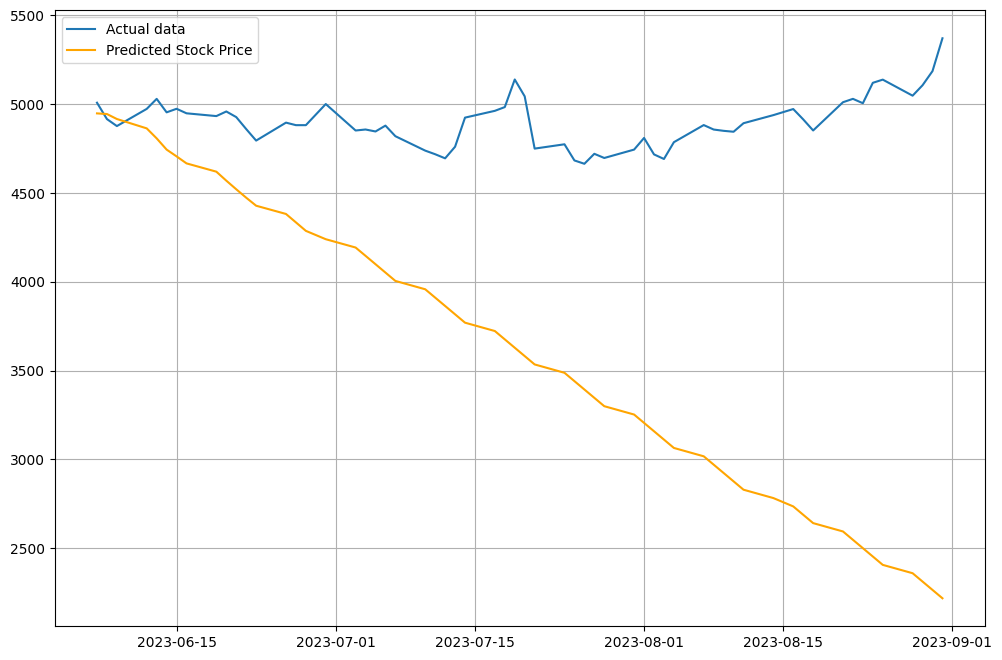

In [30]:
plt.figure(figsize=(12,8))
plt.plot(test['Close'], label='Actual data')
plt.plot(dfp, color = 'orange',label='Predicted Stock Price')
plt.legend()
plt.grid()